# Example 2: Dataframes

This Example demonstrates the capabilities of the class Dataframes_SIR3S_Model that extends SIR3S_Model be abilities to work directley with pandas dataframes.  

# Toolkit Release

In [1]:
#pip install 

# Imports

## SIR 3S Toolkit

### Regular Import/Init

In [2]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64" #change to local path

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
wrapper

<module 'sir3stoolkit.core.wrapper' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\core\\wrapper.py'>

In [5]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional Import/Init for Dataframes class

from sir3stoolkit.mantle import dataframe

We can just import the whole mantle to get all higher level modeling functions.

In [6]:
from sir3stoolkit.mantle import mantle

In [7]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


In [8]:
from sir3stoolkit.mantle import mantle

In [9]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


## Additional

In [10]:
import pandas as pd
from shapely.geometry import Point
import re
import folium
from folium.plugins import HeatMap
import numpy as np
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as cx

# Open Model

In [11]:
s3s.OpenModel(dbName=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example3.db3",
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Prepare Data

## District Heating Consumer

### Metadata

We can use the [generate_element_metadata_dataframe()](https://3sconsult.github.io/sir3stoolkit/references/sir3stoolkit.mantle.html#sir3stoolkit.mantle.dataframes.Dataframes_SIR3S_Model.generate_element_metadata_dataframe) method to obtain a dataframe for all instances of a specifc component type (Nodes, Pipes, etc.) with user defined metadata properties to be added.

In [12]:
df_consumer_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.DistrictHeatingConsumer, properties=[], geometry=True)

[2025-11-14 10:32:48,687] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-11-14 10:32:48,699] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 337 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-11-14 10:32:48,721] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 0 metadata properties.
[2025-11-14 10:32:48,722] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving geometry...
[2025-11-14 10:32:48,780] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (337, 2)


In [13]:
df_consumer_metadata.head(3)

,tk,geometry
0,4743997951091160959,POINT (713181.847468032 5578489.9250612)
1,5014209100699808035,POINT (713369.326806115 5578395.12330167)
2,4627580049017248376,POINT (713251.536184149 5578455.25247764)


### Result Data

We can use the [generate_element_metadata_dataframe()](https://3sconsult.github.io/sir3stoolkit/references/sir3stoolkit.mantle.html#sir3stoolkit.mantle.dataframes.Dataframes_SIR3S_Model.generate_element_results_dataframe) method to obtain a dataframe for all instances of a specifc component type (Nodes, Pipes, etc.) with user defined result values for certain timestamps to be added.

In [14]:
s3s.GetResultProperties_from_elementType(s3s.ObjectTypes.DistrictHeatingConsumer, True)

['DH',
 'DP',
 'DPH',
 'IAKTIV',
 'INDUV',
 'LFH',
 'LFT',
 'M',
 'MHYUV',
 'MTHUV',
 'PHIRL',
 'PHIVL',
 'QM',
 'RHOI',
 'RHOK',
 'TI',
 'TK',
 'TVMIN',
 'W',
 'WSOLL']

In [15]:
df_consumer_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.DistrictHeatingConsumer, ["PHIRL", "DH"])

[2025-11-14 10:32:48,862] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-11-14 10:32:48,864] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-11-14 10:32:49,011] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 simulation timestamps are available.
[2025-11-14 10:32:49,108] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamp(s) will be used.
[2025-11-14 10:32:49,112] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 337 tks.
[2025-11-14 10:32:49,114] INFO in sir3stoolkit.mantle.dataframes: [results] Using 2 result properties.
[2025-11-14 10:32:49,117] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-11-14 10:32:51,292] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (25, 

In [16]:
df_consumer_results.head(3)

tk                                                                    4743997951091160959  \
name                                                Fernwärmeverbraucher V-K513S R-K2993S   
end_nodes                      ('4679560319206791571', '5555145290408623045', '-1', '-1')   
property                                                                            PHIRL   
timestamp                                                                                   
2023-02-13 00:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 01:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 02:00:00.000 +01:00                                      -3.333333E+32           

tk                                           \
name                                          
end_nodes                                     
property                                 DH   
timestamp                                     
2023-02-13 00:00:00.000 +01:00  -0.02001953   
2023-02-13 01:00:00.000 +01:00  -0.02004552   
2023-02-13 02:00:00.000 +01:00  -0.02001953   

tk                                                                    5014209100699808035  \
name                                               Fernwärmeverbraucher V-K1973S R-K4453S   
end_nodes                      ('4953676020649811716', '5242043803699326835', '-1', '-1')   
property                                                                            PHIRL   
timestamp                                                                                   
2023-02-13 00:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 01:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 02:00:00.000 +01:00                                      -3.333333E+32           

tk                                            \
name                                           
end_nodes                                      
property                                  DH   
timestamp                                      
2023-02-13 00:00:00.000 +01:00   -0.01000982   
2023-02-13 01:00:00.000 +01:00   -0.01003582   
2023-02-13 02:00:00.000 +01:00  -0.009965839   

tk                                                                    4627580049017248376  \
name                                               Fernwärmeverbraucher V-K1953S R-K4433S   
end_nodes                      ('5435146706112069164', '4832493725368326102', '-1', '-1')   
property                                                                            PHIRL   
timestamp                                                                                   
2023-02-13 00:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 01:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 02:00:00.000 +01:00                                      -3.333333E+32           

tk                                           \
name                                          
end_nodes                                     
property                                 DH   
timestamp                                     
2023-02-13 00:00:00.000 +01:00  -0.08001709   
2023-02-13 01:00:00.000 +01:00  -0.08004308   
2023-02-13 02:00:00.000 +01:00  -0.07997311   

tk                                                                    5018070164989726059  \
name                                                Fernwärmeverbraucher V-K563S R-K3043S   
end_nodes                      ('5214452879555859312', '5053437289803395432', '-1', '-1')   
property                                                                            PHIRL   
timestamp                                                                                   
2023-02-13 00:00:00.000 +01:00                                      -3.333333E+32           
2023-02-13 01:00:00.000 +01:00                                      

## Pipes

### Metadata

In [17]:
df_pipes_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.Pipe, properties=["DN", "Kvr"], geometry=True, end_nodes=True)

[2025-11-14 10:32:51,895] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-11-14 10:32:51,900] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 524 element(s) of element type ObjectTypes.Pipe.
[2025-11-14 10:32:51,903] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 2 metadata properties.
[2025-11-14 10:32:51,904] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN', 'Kvr'], geometry, end nodes...
[2025-11-14 10:32:52,077] INFO in sir3stoolkit.mantle.dataframes: [metadata] 2 non-empty end node columns were created)
[2025-11-14 10:32:52,080] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (524, 6)


In [18]:
df_pipes_metadata.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK
0,5442010239090746007,150,1,"LINESTRING (713620.267807079 5578828.41875394,...",5669301360686511351,5397948523091900401
1,4917786378639043296,125,1,"LINESTRING (713602.294599536 5578860.10567987,...",5397948523091900401,5239335112004772156
2,4762482310382009633,125,1,"LINESTRING (713574.061626605 5578909.87290685,...",5239335112004772156,5298886695042021307


### Result data

In [19]:
df_pipes_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.Pipe, ["QMAV"])

[2025-11-14 10:32:52,119] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Pipe
[2025-11-14 10:32:52,120] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-11-14 10:32:52,216] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 simulation timestamps are available.
[2025-11-14 10:32:52,308] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamp(s) will be used.
[2025-11-14 10:32:52,312] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 524 tks.
[2025-11-14 10:32:52,313] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-11-14 10:32:52,314] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-11-14 10:32:54,512] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (25, 524)


In [20]:
df_pipes_results.head(3)

tk,5442010239090746007,4917786378639043296,4762482310382009633,4987229536643024523,5722206630503885118,5089459212485379804,5526871502288882655,4809089329099085219,5170001087020228683,5625716875961234775,5501916898830363065,5192970129555982907,5027225217797463802,5107343838750080243,4840056338230495043,5700872284015490704,5290590848336792638,4781821593135991761,4770083637349644299,5140383994159421977,4615723899944629797,5485743457841402038,5061682782623660813,4868922965129592512,5253822763469470014,5468996363795343031,5339499657518903527,4811306899232458618,4928779983564758026,4965578769510488820,5600841315591171772,4995034655758156710,5209057104414292468,5726827761099671871,5080791944541542127,4996979568467922520,4893521402166887668,4943852467771545411,5294908835443772392,5407639481169980338,5494345815849234157,5559756735287401600,4688455252738739891,5120913591494019846,5189136483684313738,5027271755713739562,4843364651593046845,4763398616537422727,5211657964305638265,4899878437571936054,5017291090985710926,4968195666913259627,4872293615039533867,5073852406571450055,5460451359190976355,5680559127926603859,5701217076123185999,5343389149567015241,5004534437760811077,5638727652971481339,4933247170382646480,5144558095415012328,4676843093813396651,5238385499211955735,5431464167607748731,5021757307925561906,5735390708503613465,5602200558168325137,4976126317058169697,5611058499224570176,4951309552891536851,4734625425618016004,5003475594426980558,5199984776776235548,5146987453990281112,4664282009021425543,4730098385004060223,5143417057295500465,4870893641534242754,4751771958060245818,5431352512414392985,4756919352045195395,4950699445422043390,5443612009555325057,5130272059781459965,5030450908543536722,5425728209090108132,4897883139609927597,5385910423114382788,4815053638180850703,5520594566396266859,4822932207368532352,4943632133505495565,5136719248606301905,5222700144096421193,5209596079625295991,5215757535605464866,5089350764087843246,4922208128354560629,5176883269076091732,4882993749777364317,5374456943006507008,4843836890906700052,5535463940319820632,5012186927559751405,4986912592668362327,5119633900217288954,5293317689029296733,4766100927082653384,5638908776577558151,5244494914545547298,4818046255571175936,4826614335972511296,5223081641641736592,5248841557788033271,5612538195203776712,5446352019210100674,5198739705259994278,5120004980087359327,5081007708328729580,5332936729509410779,5193926613850153217,5669055683311185692,5142801769428353146,5570925755149935463,5089627882145801048,5749509498631743083,5313314888424094938,5672198676406030965,5492269585462839687,4878085949235357089,5009009696813138306,5417154223408487165,4888087184557203150,5482200169109927461,5506250915346749683,5249576152024204638,5377200445080630699,5293057810555927426,4869711570166799356,5116990929886803340,5735615340560878820,4881353465437199724,5621715799375882738,5012002718030878203,5398733809575429001,5028247962181469636,4900101542637177072,5277687384123072302,5494173646602854486,5052735000191334434,5539639795342428023,5278182790120832611,5199049455293895634,4921179458989199657,4916972176026821426,5022571509924021844,4763784987464972068,5277721701940071811,5134029809569092929,5078017899111203433,5254059088049802980,5371971925339056665,5431036277668526595,5483354135827032665,5285379841869150294,5293405653296791451,4819969964299896962,5351904744714142235,5646757598295302988,5691533564979419761,5048873293262650113,5643610361723733925,5199821632200720341,5532148500642435090,5595641383032896800,5473664242867087532,5537095863454943245,4971302338639629382,5013314486814762862,5242300102291724928,5546837522852121331,5019054790932573745,4728990773140988900,5367689158219221191,5218286473243188911,5539804019387586531,5617925833435212075,5306936070034225058,5358411267245496507,4713734746689397424,5149494653460530987,5084014870632527368,5657819787231956123,4869220947327072403,4715322105206840823,5187233458674428963,5629674368074184841,5435501069470547583,53306533540082781

# WORK IN PROGRESS

In [21]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].astype(float)

KeyError: 'QMAV'

In [ ]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].abs()

In [ ]:
df_pipes_results=df_pipes_results.rename(columns={"QMAV": "QMAVAbs"})

### Merge

In [ ]:
df_pipes = pd.merge(
    df_pipes_metadata,
    df_pipes_results,
    on="tk",
    how="outer"
)

In [ ]:
df_pipes=df_pipes[df_pipes["Kvr"] == "1"]

In [ ]:
df_pipes.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK,timestamp,QMAVAbs
25,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 00:00:00.000 +01:00,3.667083e-10
26,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 01:00:00.000 +01:00,1.440640e-09
27,4615723899944629797,999,1,"LINESTRING (713738.296567236 5579219.90221333,...",5129584372458662150,5332825919690090061,2023-02-13 02:00:00.000 +01:00,1.414446e-09


### Plotting Constants

In [ ]:
def parse_point_string(s):
    # Extract numbers from the string using regex
    match = re.match(r'POINT\s*\(\s*([-\d\.]+)\s+([-\d\.]+)\s*\)', s)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        return Point(x, y)
    else:
        return None

In [ ]:
df_consumer['geometry'] = df_consumer['geometry'].apply(parse_point_string)

x_mean = df_consumer['geometry'].apply(lambda p: p.x if p else None).mean()
y_mean = df_consumer['geometry'].apply(lambda p: p.y if p else None).mean()

### Change datatypes

In [ ]:

df_pipes['DN'] = pd.to_numeric(df_pipes['DN'], errors='coerce')
df_pipes['QMAVAbs'] = pd.to_numeric(df_pipes['QMAVAbs'], errors='coerce')


### Filter rows

In [ ]:
df_pipes = df_pipes[df_pipes['DN'] != 999]

### Turn into gdf

In [ ]:
df_pipes['geometry'] = df_pipes['geometry'].apply(wkt.loads)

In [ ]:
gdf_pipes = gpd.GeoDataFrame(df_pipes, geometry='geometry')

In [ ]:
gdf_pipes=gdf_pipes.set_crs(epsg=4326, inplace=True)

In [ ]:
gdf_pipes.head(3)

,tk,DN,Kvr,geometry,fkKI,fkKK,timestamp,QMAVAbs
75,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 00:00:00.000 +01:00,86.89403
76,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 01:00:00.000 +01:00,87.91040
77,4621904482639719098,200,1,"LINESTRING (713283.93228 5578718.12301, 713299...",5106194195554624313,5416743601805578486,2023-02-13 02:00:00.000 +01:00,89.32416


# Plotting (WORK IN PROGRESS)

The function used below is not yet released.

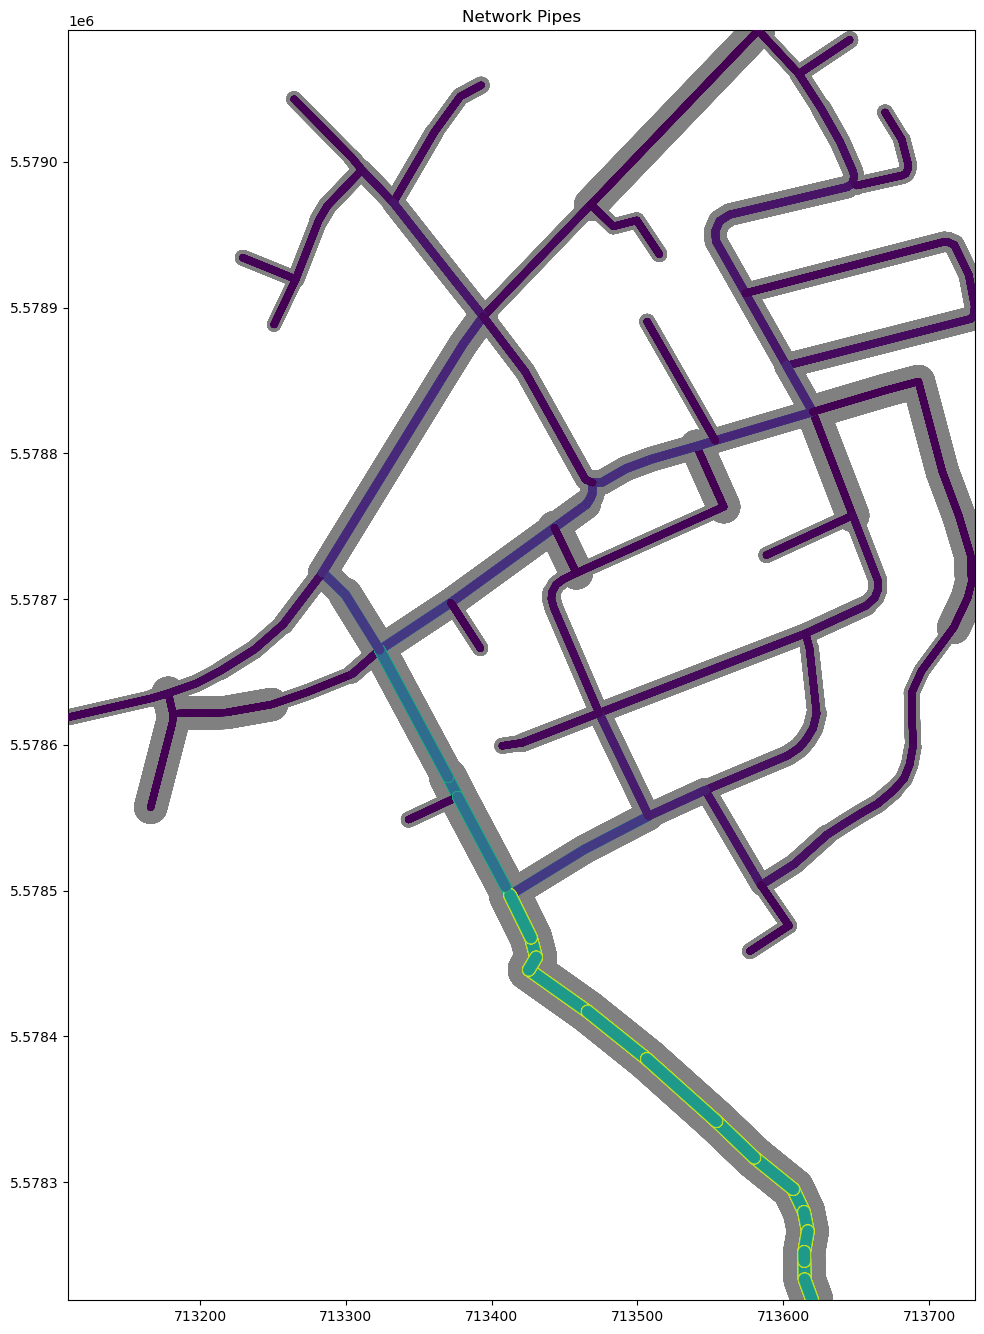

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=s3s.din_figsize("A3", orientation="portrait"))


# 1) Create the first layer (no color mixing)
layer1 = s3s.create_pipe_layer(
    gdf=gdf_pipes,
    geometry_col="geometry",
    cmap="viridis",
    width_scaling_col="DN",
    #color_mixing_col="QMAVAbs",
    min_width = 10,
    max_width = 30,
    default_color = (0.5, 0.5, 0.5, 1)
)

ax = layer1["axes"]  # grab axes from the first layer

layer2 = s3s.create_pipe_layer(
    gdf=gdf_pipes,
    ax=ax,
    geometry_col="geometry",
    cmap="viridis",
    width_scaling_col="QMAVAbs",
    color_mixing_col="QMAVAbs",
    min_width = 5,
    max_width = 10,
)

layer1["artist"].set_zorder(1)  
layer2["artist"].set_zorder(10)  

ax.set_title("Network Pipes")
plt.show()